<a href="https://colab.research.google.com/github/shahabas9/Deep_learning_basics/blob/main/Regression_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
root="/content/drive/MyDrive/ANN regression"
os.chdir(root)

In [4]:
os.getcwd()

'/content/drive/MyDrive/ANN regression'

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
housing["data"][0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [12]:
X=pd.DataFrame(housing.data,columns=housing.feature_names)

In [14]:
Y=pd.DataFrame(housing.target,columns=["target"])

In [15]:
x_train_full,x_test,y_train_full,y_full=train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,test_size=0.2,random_state=42)

In [18]:
layers=[
    tf.keras.layers.Dense(30,activation="relu",input_shape=x_train.shape[1:],name="input_layer"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(1),
]

In [19]:
model=tf.keras.Sequential(layers)

In [20]:
def coeff_determination(y_true,y_pred):
  from keras import backend as k
  ss_res=k.sum(k.square(y_true-y_pred))
  ss_total=k.sum(k.square(y_true-k.mean(y_true)))
  return (1-ss_res/(ss_total+k.epsilon()))

In [21]:
loss="mse"
optimizer="sgd"
model.compile(loss=loss,optimizer=optimizer,metrics=[coeff_determination])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 30)                270       
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [24]:
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [25]:
epochs=10

history=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_valid,y_valid))


Epoch 1/10
413/413 [==============================] - 8s 6ms/step - loss: 0.8601 - coeff_determination: 0.3163 - val_loss: 0.5253 - val_coeff_determination: 0.5938
Epoch 2/10
413/413 [==============================] - 2s 5ms/step - loss: 0.4408 - coeff_determination: 0.6524 - val_loss: 0.4447 - val_coeff_determination: 0.6559
Epoch 3/10
413/413 [==============================] - 2s 4ms/step - loss: 0.4057 - coeff_determination: 0.6756 - val_loss: 0.4242 - val_coeff_determination: 0.6701
Epoch 4/10
413/413 [==============================] - 2s 4ms/step - loss: 0.3865 - coeff_determination: 0.6926 - val_loss: 0.4013 - val_coeff_determination: 0.6858
Epoch 5/10
413/413 [==============================] - 2s 4ms/step - loss: 0.3752 - coeff_determination: 0.7045 - val_loss: 0.3948 - val_coeff_determination: 0.6952
Epoch 6/10
413/413 [==============================] - 2s 4ms/step - loss: 0.3664 - coeff_determination: 0.7086 - val_loss: 0.3848 - val_coeff_determination: 0.7007
Epoch 7/10
413/4

In [26]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,0.860122,0.316348,0.525255,0.593784
1,0.440773,0.652418,0.444728,0.655872
2,0.405675,0.675641,0.424177,0.670090
3,0.386455,0.692556,0.401255,0.685768
4,0.375235,0.704511,0.394815,0.695155
5,0.366353,0.708563,0.384847,0.700691
6,0.360349,0.711268,0.389782,0.697618
7,0.354347,0.715710,0.371786,0.709814
8,0.350514,0.718104,0.368172,0.711895
9,0.347523,0.718358,0.363680,0.716864


<Axes: >

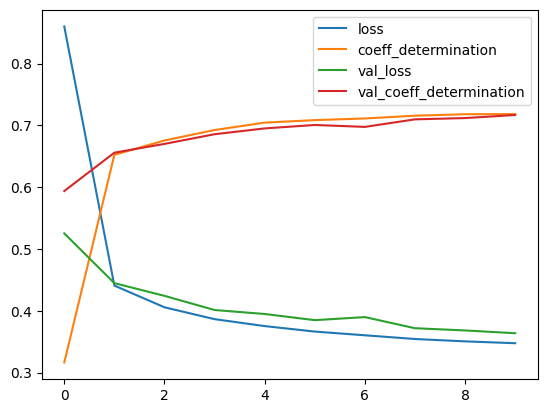

In [27]:
pd.DataFrame(history.history).plot()

In [29]:
model.evaluate(x_test,y_full)

129/129 [==============================] - 1s 4ms/step - loss: 0.3572 - coeff_determination: 0.7052


[0.35722172260284424, 0.7052239179611206]

In [30]:
new = x_test[0]
new

array([-1.15763869, -0.28336379, -0.57962896, -0.18908216, -0.03070471,
        0.12364657,  0.19362619,  0.28590977])

In [31]:
new = new.reshape(1,8)

In [32]:
model.predict(new)

1/1 [==============================] - 0s 174ms/step


array([[0.8486108]], dtype=float32)